In [1]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import h5py
import json
import pickle
import glob
import socket
import os

In [2]:
hostname = socket.gethostname()
if hostname == 'HAITI' or 'Gorleben':
    DIR = "C:/Users/xin/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "D:/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'BALI':
    DIR = "/home/xin/projects/trelleborg"
    DATASET = "/storage/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'LAPTOP-1FOJITEG':
    DIR = "C:/Users/xinch/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "C:/LINHC/VersucheDBs/Trelleborg/V27/*.h5"
DIR = os.path.abspath(DIR)
DATASET = os.path.abspath(DATASET)

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)
file_list = sorted(file_list)
file_list_LEM1 = [file for file in file_list if 'LEM1' in file]
file_list_LEM1

['C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-100bar_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-200bar_LEM1.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\V27\\V27-30bar_LEM1.h5']

In [3]:
def load_and_plot(num):
    file = file_list_LEM1[num]
    filename = file.split(os.sep)[-1][:-3]
    h51 = h5py.File(file, "r")
    print("file:",filename)
    print("\nATTR:")
    print(h51.attrs.keys())
    print("\nKeys:")
    print(h51.keys())
    
    json_object = json.loads(h51.attrs["name_lookup"])
    json_formatted_str = json.dumps(json_object, indent=2)
    print("\nLOOKUP:")
    print(json_formatted_str)
    
    # frequency index
    freq = 20
    %matplotlib inline
    plt.figure(figsize=(10,8))
    plt.plot(h51['spd1'],label='speed (negative)')
    plt.plot(h51['ip1k1'],label='intermidiate seal pressure')
    plt.plot(h51['k1t'],label='temperature')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

file: V27-100bar_LEM1

ATTR:
<KeysViewHDF5 ['name_lookup', 'name_rev_lookup']>

Keys:
<KeysViewHDF5 ['S11_LEM1', 'S21_P1_LEM1', 'S21_P2_LEM1', 'S22_LEM1', 'hub1', 'hub2', 'ip1k1', 'ip1k2', 'ip2k1', 'ip2k2', 'k1at', 'k1f', 'k1p', 'k1t', 'k2at', 'k2f', 'k2p', 'k2t', 'phi', 'pos1', 'pos2', 'shub1', 'shub2', 'sk1at', 'sk1f', 'sk1p', 'sk1t', 'sk2at', 'sk2f', 'sk2p', 'sk2t', 'spd1', 'spd2', 'sphi', 'spos1', 'spos2', 'sspd1', 'sspd2', 'stdf', 't', 'tdf']>

LOOKUP:
{
  "Ist-Ablauf-Zeit, ca.": "t",
  "Ist-MG1: Teller-Drehfrequenz [Hz]": "tdf",
  "Soll-MG1: Teller-Drehfrequenz [Hz]": "stdf",
  "Ist-MG2: Kammer1-Temp[\u00b0C]": "k1t",
  "Soll-MG2: Kammer1-Temp[\u00b0C]": "sk1t",
  "Ist-MG3: Kammer1-Druck[bar]": "k1p",
  "Soll-MG3: Kammer1-Druck[bar]": "sk1p",
  "Ist-MG4: Kammer2-Temp.[\u00b0C]": "k2t",
  "Soll-MG4: Kammer2-Temp.[\u00b0C]": "sk2t",
  "Ist-MG5: Kammer2-Druck[bar]": "k2p",
  "Soll-MG5: Kammer2-Druck[bar]": "sk2p",
  "Ist-MG6: Kammer1-Kraft[kN]": "k1f",
  "Soll-MG6: Kammer1-Kraft[kN]

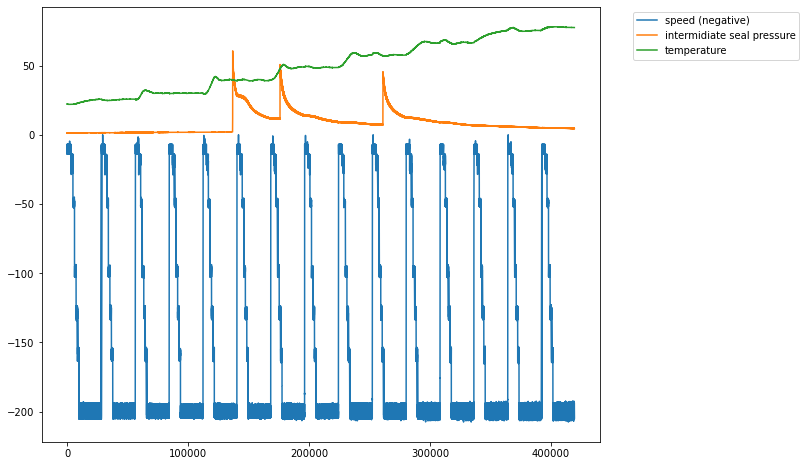

In [4]:
load_and_plot(0)

In [5]:
file = file_list_LEM1[0]
filename = file.split(os.sep)[-1][:-3]

if 'LEM1' in filename:
    POS = 'pos1'
    SPD = 'spd1'
    S21 = 'S21_P1_LEM1'
elif 'LEM2' in filename:
    POS = 'pos2'
    SPD = 'spd2'
    S21 = 'S21_P1_LEM2'
    
h51 = h5py.File(file, "r")

# all low speed area timestamps as "low"
low = np.where(h51[SPD][:]>-40)[0]

# skip the first 450 points because of the duration of 1st lsa is always a bit different
# thees points are also skipped for the consistency in the following codes
low = low[low>450]

pos_low = h51[POS][low]
# all low speed areas as seperate arrays
low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
pos_low_sep = np.split(pos_low,low_sep+1)

Ls = np.append(low[low_sep],low[-1])
print("timestamps of Ls:")
print (Ls)

Fs = np.append(low[0],low[low_sep+1])
print("\ntimestamps of Fs:")
print (Fs)
print("\nDurations of lsa:\n",Ls-Fs)

timestamps of Ls:
[  4854  32841  60824  88812 116796 144781 172768 200753 228737 256726
 284716 312700 340692 368681 396669]

timestamps of Fs:
[   451  28449  56436  84419 112406 140390 168375 196362 224348 252332
 280320 308310 336295 364285 392274]

Durations of lsa:
 [4403 4392 4388 4393 4390 4391 4393 4391 4389 4394 4396 4390 4397 4396
 4395]


In [6]:
shift_opts_freqs = pickle.load( open( DIR + "/data/V27/shift_opts_freqs/" +filename + ".pkl", "rb" ) )
shift_opts_freqs.shape

(121, 15)

In [26]:
X = np.array(h51['t'][Fs]).reshape(-1,1) # 
y = np.array(shift_opts_freqs[30]).reshape(-1,1)

<AxesSubplot:>

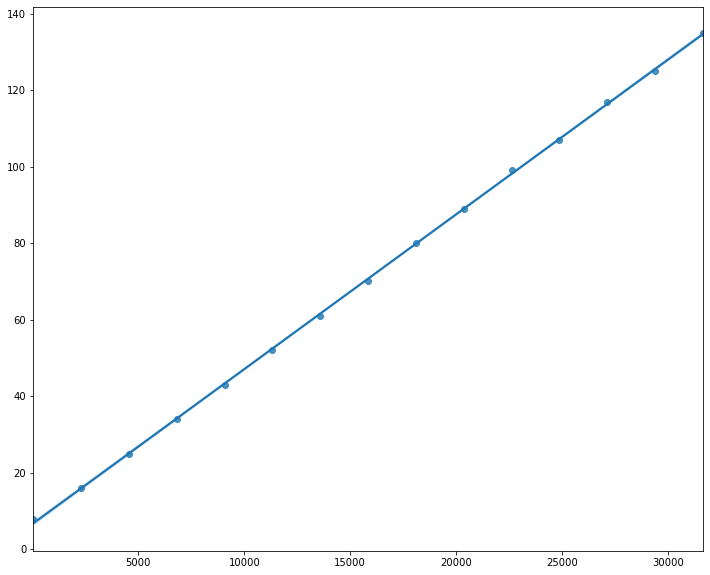

In [27]:
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

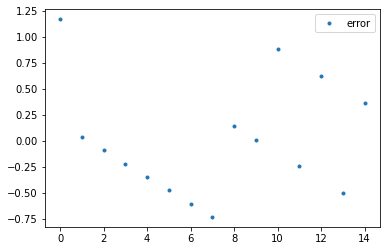

In [29]:
err = y - reg.predict(X)
plt.plot(err,'.',label = 'error')
plt.legend()

In [30]:
shift_opts_freqs[30]

array([  8,  16,  25,  34,  43,  52,  61,  70,  80,  89,  99, 107, 117,
       125, 135])

In [31]:
shift = reg.predict(np.array(h51['t']).reshape(-1,1))
t_shift = np.array(h51['t']).reshape(-1,1) - shift

In [32]:
shift.shape

(419301, 1)

In [14]:
shift.round()

array([[  9.],
       [  9.],
       [  9.],
       ...,
       [135.],
       [135.],
       [135.]])

## LR

In [15]:
shift_opts_freqs_all = []
for i in range (121):
    X = np.array(h51['t'][Fs]).reshape(-1,1)
    y = np.array(shift_opts_freqs[i]).reshape(-1,1)
    reg = LinearRegression().fit(X, y)
    shift = reg.predict(np.array(h51['t']).reshape(-1,1))
    shift_opts_freqs_all.append(shift)

In [16]:
shift_opts_freqs_all = np.array(shift_opts_freqs_all).squeeze()
shift_opts_freqs_all.shape

(121, 419301)

## Check

In [33]:
shift_opts_freqs[30] # grid search

array([  8,  16,  25,  34,  43,  52,  61,  70,  80,  89,  99, 107, 117,
       125, 135])

In [34]:
shift_opts_freqs_all[30][Fs].round() # LR

array([  7.,  16.,  25.,  34.,  43.,  52.,  62.,  71.,  80.,  89.,  98.,
       107., 116., 126., 135.])

# LR for ALL

In [38]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
import h5py
import json
import pickle
import glob
import socket
import os
from sklearn.linear_model import LinearRegression

hostname = socket.gethostname()
if hostname == 'HAITI' or 'Gorleben':
    DIR = "C:/Users/xin/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "D:/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'BALI':
    DIR = "/home/xin/projects/trelleborg"
    DATASET = "/storage/xin/datasets/Trelleborg/V27/*.h5"
if hostname == 'LAPTOP-1FOJITEG':
    DIR = "C:/Users/xinch/OneDrive - bwstaff/xin/trelleborg"
    DATASET = "C:/LINHC/VersucheDBs/Trelleborg/V27/*.h5"
DIR = os.path.abspath(DIR)
DATASET = os.path.abspath(DATASET)

file_list = []
for file in glob.glob(DATASET):
    file_list.append(file)
file_list = sorted(file_list)
file_list_LEM1 = [file for file in file_list if 'LEM1' in file]
file_list_LEM1
        
for file in file_list_LEM1:
## Loading files
    filename = file.split(os.sep)[-1][:-3]
    shift_opts_freqs = pickle.load( open( DIR + "/data/V27/shift_opts_freqs/" +filename + ".pkl", "rb" ) )
    with h5py.File(file, "r") as h51:
        # all low speed area timestamps as "low"
        low = np.where(h51[SPD][:]>-40)[0]
        # skip the first 450 points because of the duration of 1st lsa is always a bit different
        # thees points are also skipped for the consistency in the following codes
        low = low[low>450]
        pos_low = h51['pos1'][low]
        low_sep = np.where(np.diff(low)>3000)[0] # check if 3000 fit for all datasets
        pos_low_sep = np.split(pos_low,low_sep+1)
        Ls = np.append(low[low_sep],low[-1])
        Fs = np.append(low[0],low[low_sep+1])

## LR for all frequencies
        shift_opts_freqs_all = []
        for i in range (121):
            X = np.array(h51['t'][Fs]).reshape(-1,1)
            y = np.array(shift_opts_freqs[i]).reshape(-1,1)
            reg = LinearRegression().fit(X, y)
            shift = reg.predict(np.array(h51['t']).reshape(-1,1)).reshape(-1)
            # LR predicted shift "shfit" should not be more than 2 points away from 
            # grid-search-based "shift "shift_opts_freqs[i]"
            assert all(abs(shift[Fs]-shift_opts_freqs[i]))<2
            shift_opts_freqs_all.append(shift)
        shift_opts_freqs_all = np.array(shift_opts_freqs_all).squeeze().round().astype(int)
        assert shift_opts_freqs_all.shape[0] == 121
        folder = DIR + '/data/V27/shift_opts_freqs_all/'
        Path(folder).mkdir(parents=True, exist_ok=True)
        pklName = folder + filename + '.pkl'
        pickle.dump(shift_opts_freqs_all, open(pklName, 'wb')) 
